# ReadMe
1. Data Preparation / Preprocessing
- Import 'master_data.csv' that is prepared in 'COMP4135_Data_Preparation.ipynb'
- Two features will be used here first
    - avg_watching_count
    - avg_completion_percentage

2. K-Means Clustering
- Feature Scaling
- K-means clustering
- Interpretation

3. Fuzzy Inference System
- Membership Functions Formulation
- Membership Functions Visualization
- Fuzzy Rules Setting
- Fuzzy System

4. Demonstration

In [1]:
import pandas as pd

# 1. Import Data

In [2]:
#1 Import dataset
master_data = pd.read_csv('master_data.csv')

In [3]:
master_data.head()

,Unnamed: 0,user_id,avg_watching_count,avg_completion_percentage,courses_count,avg_enroll_time,grade
0,0,U_8126464,10.759358,1.174700,5,21,33
1,1,U_8650752,4.723404,0.574468,5,9,77
2,2,U_131074,2.555556,0.000000,6,17,98
3,3,U_262145,2.000000,0.581395,4,15,76
4,4,U_1441801,3.470588,0.000000,5,16,88


In [4]:
# drop the first column, 'courses_count' and 'avg_enroll_time'
# because only two features (avg_watching_count and avg_completion_percentage) will be used here.

data = master_data.drop(['Unnamed: 0', 'courses_count', 'avg_enroll_time'], axis=1)
data

,user_id,avg_watching_count,avg_completion_percentage,grade
0,U_8126464,10.759358,1.174700,33
1,U_8650752,4.723404,0.574468,77
2,U_131074,2.555556,0.000000,98
3,U_262145,2.000000,0.581395,76
4,U_1441801,3.470588,0.000000,88
...,...,...,...,...
48635,U_2621421,6.419355,0.274194,80
48636,U_6684659,6.000000,0.818182,31
48637,U_8126455,1.358025,0.777778,56
48638,U_7995385,4.500000,0.157895,17


# 2. K-means Clustering

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

## 2.1 Feature Scaling
- Two features are needed to be normalized.
- Feature scaling is a method used to normalize the range of independent variables

In [6]:
data.describe()

,avg_watching_count,avg_completion_percentage,grade
count,48640.000000,48640.000000,48640.000000
mean,5.373373,0.550712,49.528783
std,4.815669,0.345521,28.797066
min,1.000000,0.000000,0.000000
25%,2.640000,0.341853,25.000000
50%,4.062500,0.525253,50.000000
75%,6.473684,0.711275,74.000000
max,132.043165,20.574163,99.000000


In [7]:
# exclude user_id (string) and grade (target)
X = data[['avg_watching_count', 'avg_completion_percentage']]
cols = X.columns

In [8]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [9]:
# X is scaled data with size 1000
X = pd.DataFrame(X, columns=[cols])
X.head()

,avg_watching_count,avg_completion_percentage
0,0.074474,0.057096
1,0.028414,0.027922
2,0.011871,0.000000
3,0.007631,0.028259
4,0.018853,0.000000


## 2.2 K-means clustering
Resource: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

- n_samples: number of samples or observations (rows)
- n_features: number of features or variables (columns)
- centers: number of clusters to create
- cluster_std: the standard deviation of the clusters. The lower the standard deviation, the closer will be data points in a given cluster
- random_state: Set this to any int (generally 0 or 42) to get the same output when you run it multiple times. When there is a randomization process involved, you should use random_state to create reproducible output. If you don’t use this parameter, you may get different output than presented in this article.

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.

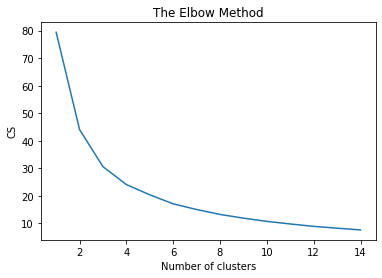

In [10]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

<b> Since the elbow is positioned at 4, the number of clusters would be 4 in this case.

Text(0.5, 1.0, 'K-means Clustering')

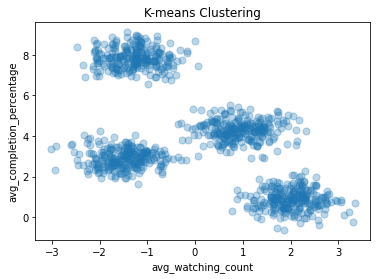

In [11]:
# Resource: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.3);
plt.xlabel("avg_watching_count")
plt.ylabel("avg_completion_percentage")
plt.title("K-means Clustering")

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

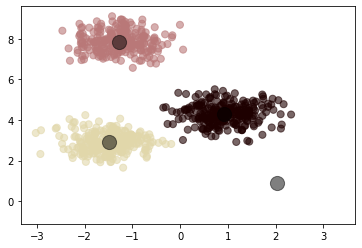

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='pink_r', alpha=0.6)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [15]:
df_clustered = data
demo = pd.DataFrame(data, columns=['avg_watching_count', 'avg_completion_percentage'])
df_clustered['cluster'] = kmeans.fit_predict(demo)
df_clustered.head()

,user_id,avg_watching_count,avg_completion_percentage,grade,cluster
0,U_8126464,10.759358,1.174700,33,0
1,U_8650752,4.723404,0.574468,77,3
2,U_131074,2.555556,0.000000,98,3
3,U_262145,2.000000,0.581395,76,3
4,U_1441801,3.470588,0.000000,88,3


In [16]:
from collections import Counter
Counter_dict = Counter(kmeans.labels_)
Counter_dict

Counter({0: 12931, 3: 32931, 2: 2557, 1: 221})

In [17]:
pd.DataFrame(Counter_dict.items(), columns=['Cluster', 'Data_points_count'])

,Cluster,Data_points_count
0,0,12931
1,3,32931
2,2,2557
3,1,221


In [18]:
df_clustered

,user_id,avg_watching_count,avg_completion_percentage,grade,cluster
0,U_8126464,10.759358,1.174700,33,0
1,U_8650752,4.723404,0.574468,77,3
2,U_131074,2.555556,0.000000,98,3
3,U_262145,2.000000,0.581395,76,3
4,U_1441801,3.470588,0.000000,88,3
...,...,...,...,...,...
48635,U_2621421,6.419355,0.274194,80,0
48636,U_6684659,6.000000,0.818182,31,0
48637,U_8126455,1.358025,0.777778,56,3
48638,U_7995385,4.500000,0.157895,17,3


In [19]:
# Get average value for two features to group by clusters
df_result = df_clustered.groupby('cluster').mean()
df_result

,avg_watching_count,avg_completion_percentage,grade
cluster,,,
0,7.923312,0.608486,49.842394
1,44.054194,1.296685,48.529412
2,17.210829,0.823224,48.191631
3,3.193358,0.501860,49.516170


## 2.3 Interpretation of Clustering Result

### 2.3.1 Average Watching Count Summary

In [20]:
# Analyze avg_watching count
print("Min Watching Count: {}".format(data['avg_watching_count'].min()))
print("Max Watching Count: {}".format(data['avg_watching_count'].max()))
print("Median Watching Count: {}".format(data['avg_watching_count'].median()))
print("SD Watching Count: {}".format(data['avg_watching_count'].std()))
print("Mean Watching Count: {}".format(data['avg_watching_count'].mean()))

Min Watching Count: 1.0
Max Watching Count: 132.0431654676259
Median Watching Count: 4.0625
SD Watching Count: 4.81566857710995
Mean Watching Count: 5.3733732662488825


<AxesSubplot:xlabel='avg_watching_count', ylabel='Count'>

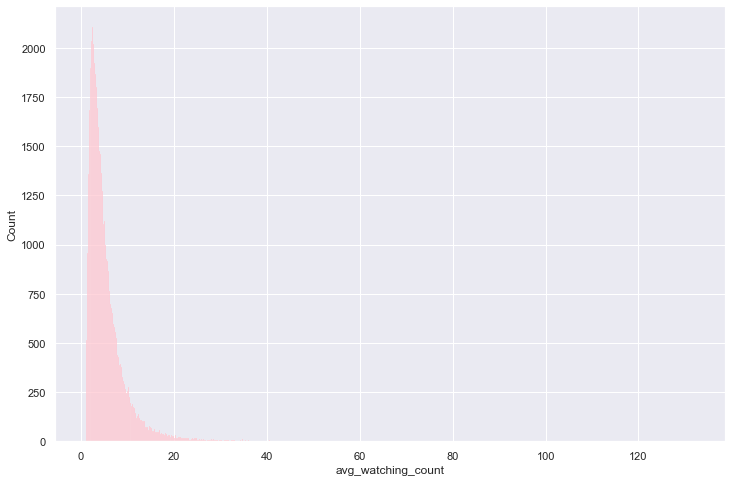

In [21]:
# Histogram
sns.set(rc={"figure.figsize":(12, 8)})
sns.histplot(data=data, x="avg_watching_count", color = "pink")

<AxesSubplot:xlabel='avg_watching_count'>

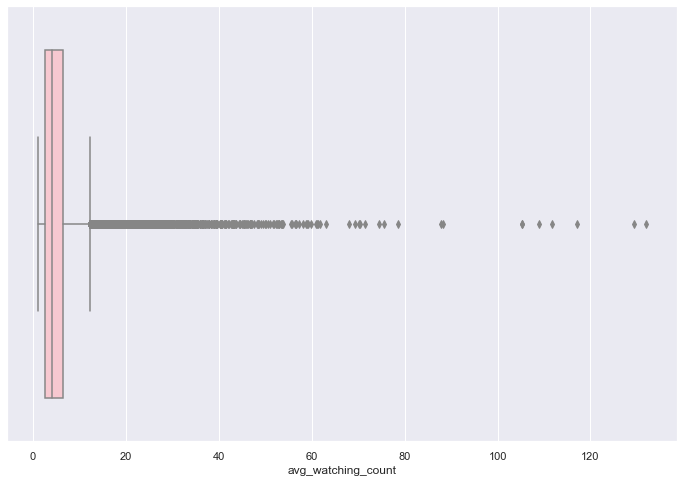

In [22]:
# Boxplot
sns.boxplot(x=data["avg_watching_count"], color = "pink")

### 2.3.2 Average Completion Percentage Summary

In [23]:
# Analyze avg_watching count
print("Min Completion: {}%".format(data['avg_completion_percentage'].min()*100))
print("Max Completion: {}%".format(data['avg_completion_percentage'].max()*100))
print("Median Completion: {}%".format(data['avg_completion_percentage'].median()*100))
print("SD Completion: {}".format(data['avg_completion_percentage'].std()))
print("Mean Completion: {}%".format(data['avg_completion_percentage'].mean()*100))

Min Completion: 0.0%
Max Completion: 2057.416267942584%
Median Completion: 52.52525252525253%
SD Completion: 0.3455211026781418
Mean Completion: 55.07116847929796%


<AxesSubplot:xlabel='avg_completion_percentage', ylabel='Count'>

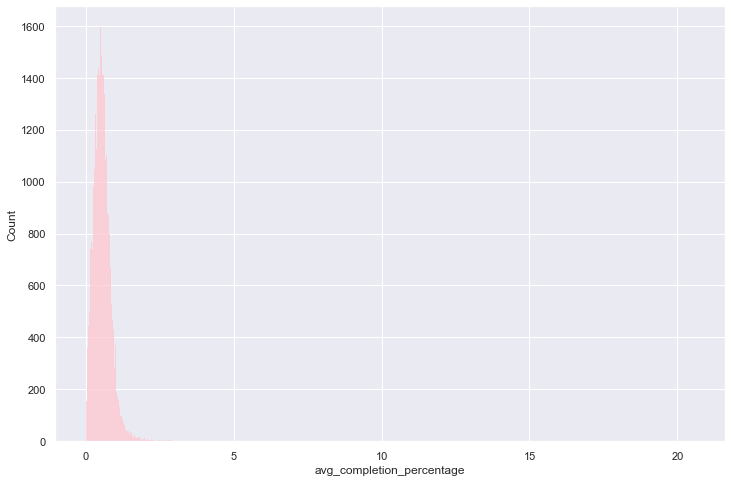

In [24]:
# Histogram
sns.histplot(data=data, x="avg_completion_percentage", color = "Pink")

<AxesSubplot:xlabel='avg_completion_percentage'>

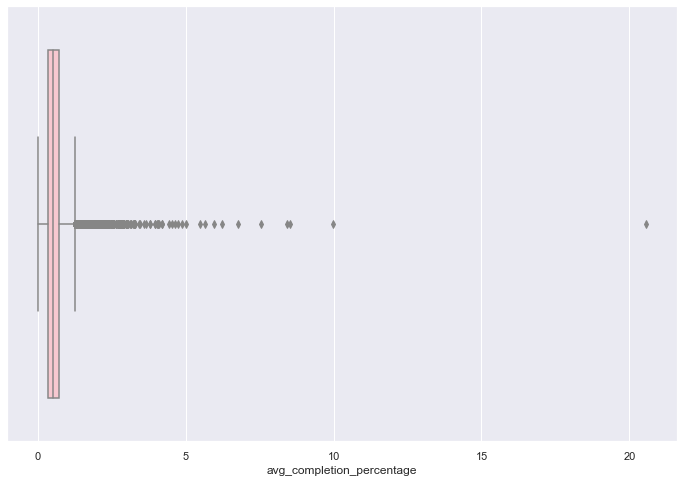

In [25]:
# Boxplot
sns.boxplot(x=data["avg_completion_percentage"], color = "pink")

### 2.3.3 Grade Summary 

In [26]:
# Analyze grade
print("Min Grade: {}".format(data['grade'].min()))
print("Max Grade: {}".format(data['grade'].max()))
print("Median Grade: {}".format(data['grade'].median()))
print("SD Grade: {}".format(data['grade'].std()))
print("Mean Grade: {}".format(data['grade'].mean()))

Min Grade: 0
Max Grade: 99
Median Grade: 50.0
SD Grade: 28.79706637069079
Mean Grade: 49.52878289473684


<AxesSubplot:xlabel='grade', ylabel='Count'>

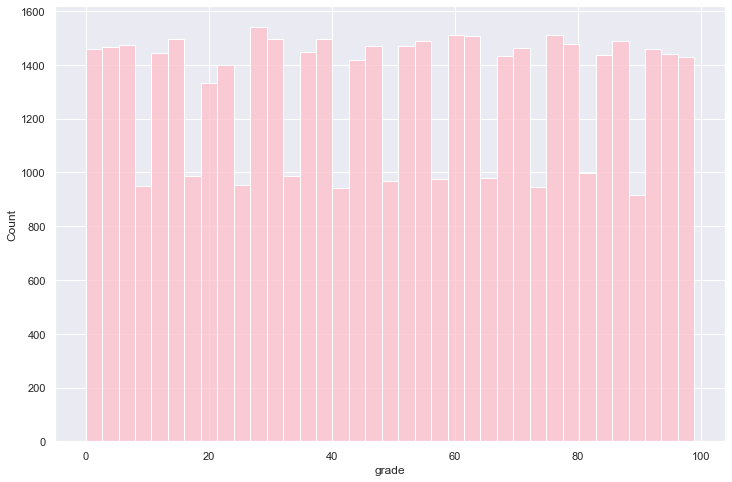

In [27]:
# Histogram
sns.histplot(data=data, x="grade", color = "Pink")

<AxesSubplot:xlabel='grade'>

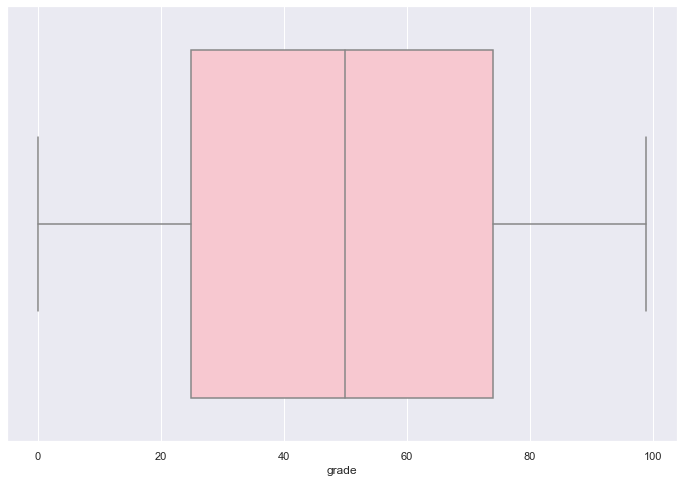

In [28]:
# Boxplot
sns.boxplot(x=data["grade"], color = "pink")

# 3. Fuzzy Inference System
## 3.1 Membership Function Formulation
Resource: https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

In [29]:
pip install -U scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [31]:
# New Antecedent/Consequent objects hold universe variables and membership functions
watching_count = ctrl.Antecedent(np.arange(0, 100, 1), 'watching_count')
completion_perc = ctrl.Antecedent(np.arange(0, 100, 1), 'completion_perc')
performance = ctrl.Consequent(np.arange(0, 101, 1), 'performance')

# Auto-membership function population is possible with .automf(3, 5, or 7)
# However, according to clustering, we need 4. Therefore, specific names must be given.
watching_count.automf(4, names=['Rarely', 'Occasionally', 'Frequently', 'Very Frequently'])
completion_perc.automf(4, names=['Lower-Half', 'Upper-Half', 'Most', 'Full'])


# Custom membership functions can be built interactively with a familiar,
# Pythonic API
performance['Bad'] = fuzz.trimf(performance.universe, [0, 0, 20])
performance['Average'] = fuzz.trimf(performance.universe, [0, 20, 75])
performance['Good'] = fuzz.trimf(performance.universe, [20, 75, 90])
performance['Excellent'] = fuzz.trimf(performance.universe, [75, 100, 100])

## 3.2 Membership Functions Visualization
### 3.2.1 Watching Count

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


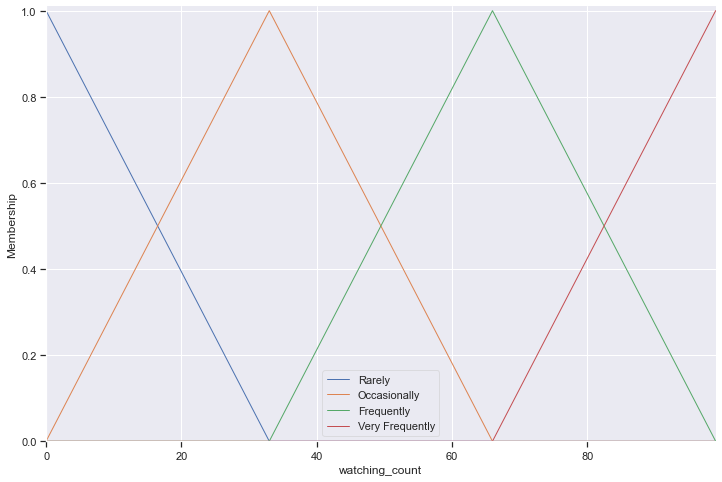

In [32]:
# You can see how these look with .view()
watching_count.view()

### 3.2.2 Completion Percentage

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


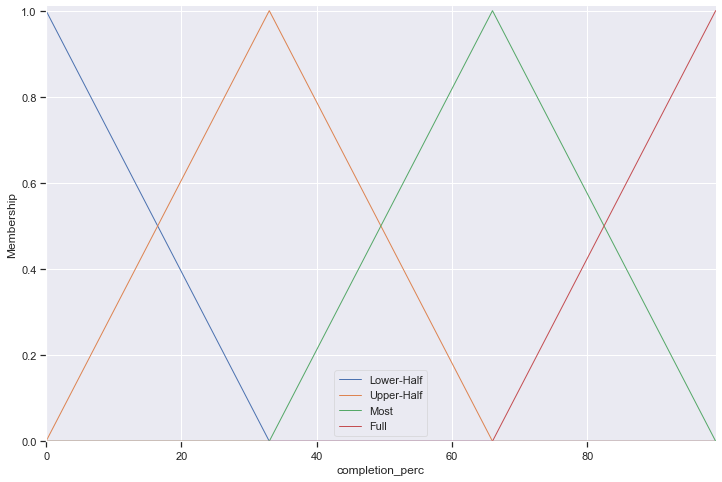

In [33]:
completion_perc.view()

### 3.2.3 Student Performance

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


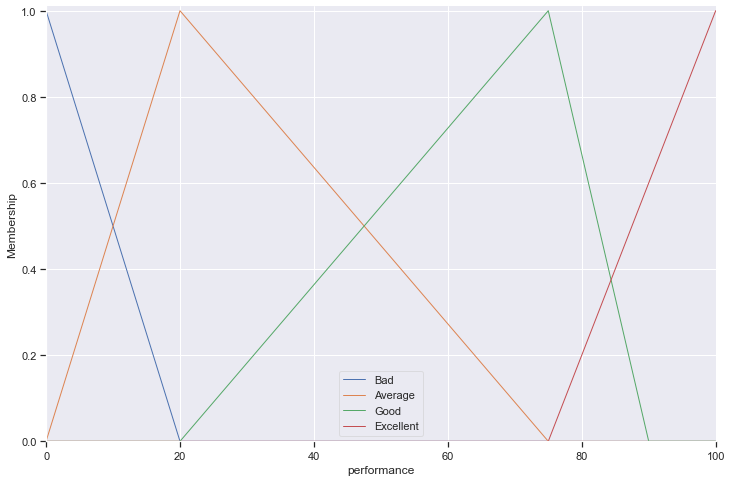

In [34]:
performance.view()

## 3.3 Fuzzy Rules Setting

In [35]:
rule1 = ctrl.Rule(watching_count['Rarely'] & completion_perc['Lower-Half'], performance['Bad'])
rule2 = ctrl.Rule(watching_count['Occasionally'] | completion_perc['Upper-Half'], performance['Average'])
rule3 = ctrl.Rule(watching_count['Frequently'] | completion_perc['Most'], performance['Good'])
rule4 = ctrl.Rule(watching_count['Very Frequently'] | completion_perc['Full'], performance['Excellent'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [36]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# 4. Demonstration

Expected Grade = 26.910281229458896


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


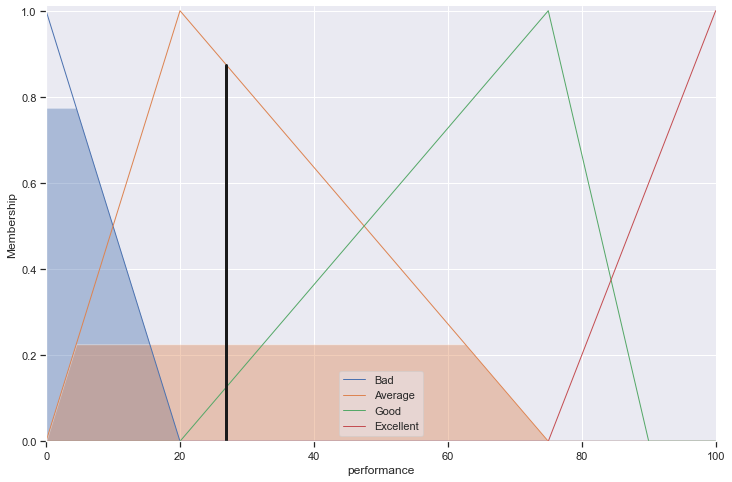

In [37]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API

# Your Input
    # Watching_count = 0 ~ 100
    # Completion_perct = 0 ~ 100
tipping.input['watching_count'] = 7.44
tipping.input['completion_perc'] = 0.946

# Crunch the numbers
tipping.compute()

print("Expected Grade = {}".format(tipping.output['performance']))
performance.view(sim=tipping)